In [90]:
import scipy.odr as odr
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def f(B, x):
    return B[0]*x + B[1]

In [ ]:
import numpy.linalg as la
def tls(X,y):

    
    Z = np.vstack((X.T,y)).T
    U, s, Vt = la.svd(Z, full_matrices=True)
    
    V = Vt.T
    Vxy = V[0,0]
    Vyy = V[1,0]
    a_tls = Vyy / Vxy # total least squares soln
    
    return a_tls

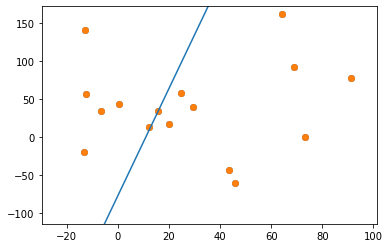

Beta: [  7.06869019 -77.41358899]
Beta Std Error: [  7.04276709 126.91169649]
Beta Covariance: [[ 0.03195912 -0.50022793]
 [-0.50022793 10.37794652]]
Residual Variance: 1552.0005504446042
Inverse Condition #: 0.02690394558474443
Reason(s) for Halting:
  Sum of squares convergence
7.068690194406575
7.0711826549714205


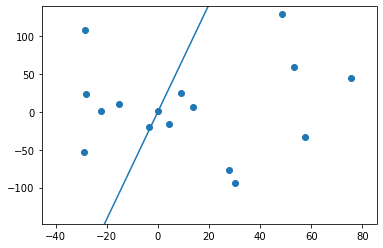

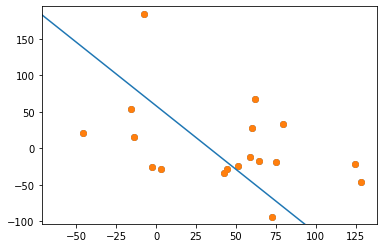

Beta: [-1.74346573 58.29067443]
Beta Std Error: [ 0.71281153 33.90508018]
Beta Covariance: [[ 1.98462586e-04 -7.00186023e-03]
 [-7.00186023e-03  4.49012846e-01]]
Residual Variance: 2560.1816812161533
Inverse Condition #: 0.014074184232441427
Reason(s) for Halting:
  Sum of squares convergence
-1.743465729799853
-1.7439382198987474


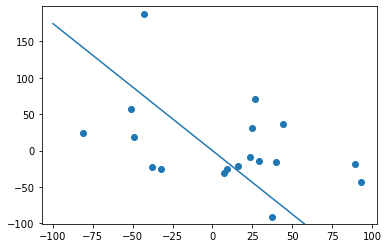

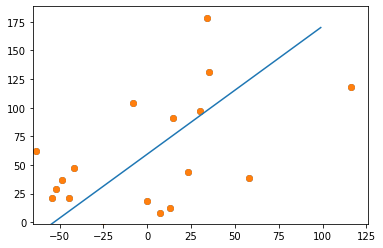

Beta: [ 1.11718461 59.42046357]
Beta Std Error: [ 0.31627468 12.25363692]
Beta Covariance: [[7.58139982e-05 3.25452808e-04]
 [3.25452808e-04 1.13802175e-01]]
Residual Variance: 1319.4090338092674
Inverse Condition #: 0.026215719224151113
Reason(s) for Halting:
  Sum of squares convergence
1.1171846123290639
1.1172756567835516


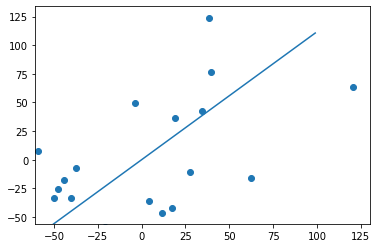

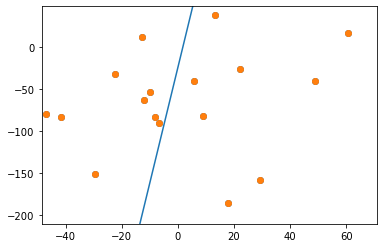

Beta: [ 13.71753598 -24.23385692]
Beta Std Error: [ 18.04632643 119.30822083]
Beta Covariance: [[ 0.3282426   1.26671407]
 [ 1.26671407 14.34689979]]
Residual Variance: 992.1621933226842
Inverse Condition #: 0.12400735636315065
Reason(s) for Halting:
  Sum of squares convergence
13.71753597772983
13.718890050242766


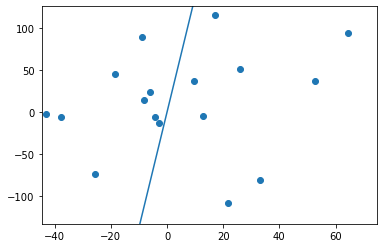

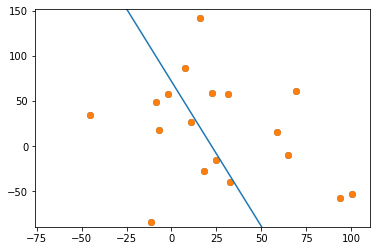

Beta: [-3.21621281 71.90058939]
Beta Std Error: [ 1.83381715 46.82093145]
Beta Covariance: [[ 0.00166173 -0.0292838 ]
 [-0.0292838   1.08325266]]
Residual Variance: 2023.71958016291
Inverse Condition #: 0.028335228175982646
Reason(s) for Halting:
  Sum of squares convergence
-3.2162128053161436
-3.2171313931528904


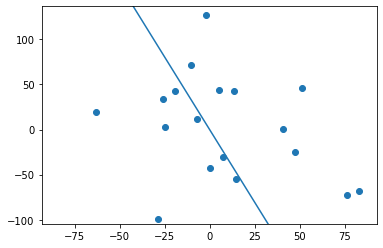

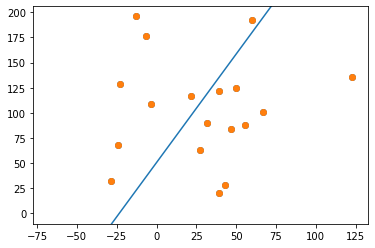

Beta: [ 2.15679597 50.64693464]
Beta Std Error: [ 0.89503936 28.93962154]
Beta Covariance: [[ 4.37181804e-04 -8.73334458e-03]
 [-8.73334458e-03  4.57049775e-01]]
Residual Variance: 1832.4080662110525
Inverse Condition #: 0.024418507465833978
Reason(s) for Halting:
  Sum of squares convergence
2.1567959659197027
2.157206765574668


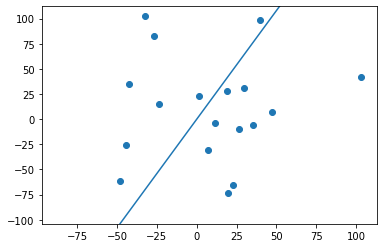

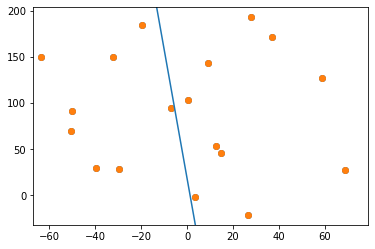

Beta: [-14.01312068  18.08385033]
Beta Std Error: [ 26.6504923  179.22907979]
Beta Covariance: [[ 0.42754636  2.01203519]
 [ 2.01203519 19.33702648]]
Residual Variance: 1661.2204093010275
Inverse Condition #: 0.10450307586067539
Reason(s) for Halting:
  Sum of squares convergence
-14.013120681451637
-14.021578948279954


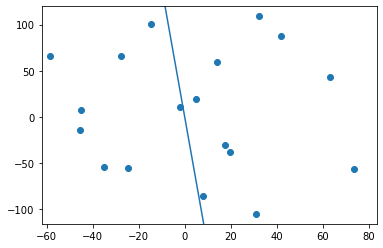

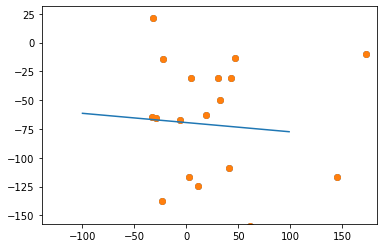

Beta: [ -0.0802527  -69.45156657]
Beta Std Error: [ 0.19004459 12.68382391]
Beta Covariance: [[ 1.20531447e-05 -2.01467721e-04]
 [-2.01467721e-04  5.36895493e-02]]
Residual Variance: 2996.4749395652325
Inverse Condition #: 0.014657282617024467
Reason(s) for Halting:
  Sum of squares convergence
-0.08025269617652188
-0.08034876572621226


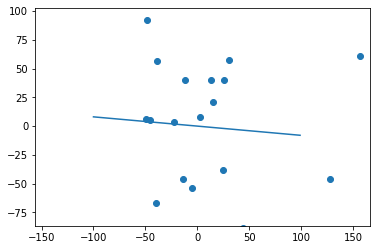

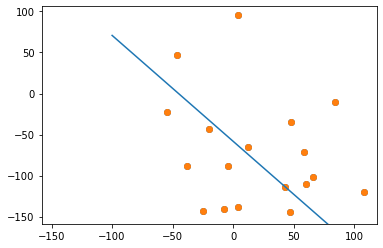

Beta: [ -1.28918331 -58.1459099 ]
Beta Std Error: [ 0.42765439 20.31969726]
Beta Covariance: [[ 6.30504928e-05 -7.63420366e-04]
 [-7.63420366e-04  1.42343320e-01]]
Residual Variance: 2900.663664161664
Inverse Condition #: 0.02064421882663849
Reason(s) for Halting:
  Sum of squares convergence
-1.289183311993071
-1.2893810413735274


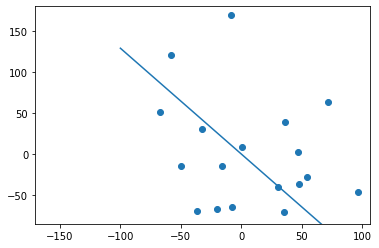

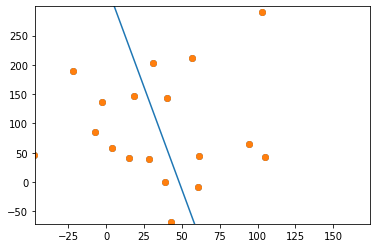

Beta: [ -7.00326092 337.67265008]
Beta Std Error: [  6.52058843 252.34183873]
Beta Covariance: [[ 1.45211140e-02 -5.28638580e-01]
 [-5.28638580e-01  2.17472769e+01]]
Residual Variance: 2928.0173317602535
Inverse Condition #: 0.008629812750743879
Reason(s) for Halting:
  Sum of squares convergence
-7.003260922543707
-7.005180351169402


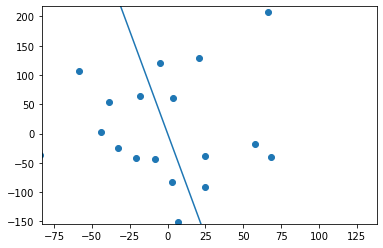

<Figure size 432x288 with 0 Axes>

In [121]:
for k in range(10):
    true_B = np.random.uniform(-10,10,2)
    data_y = [f(true_B, i) + np.random.normal(0,50) for i in range(20)]
    data_x = [i + np.random.normal(0,50) for i in range(20)]
    plt.scatter(data_x, data_y)
    
    linear = odr.Model(f)
    data = odr.Data(data_x, data_y)
    testodr = odr.ODR(data, linear, beta0=[0.1,0.1])
    output = testodr.run()
    
    y = [f(output.beta, i) for i in range(-100,100)]
    x = [i for i in range(-100, 100)]
    plt.xlim(np.min(data_x) + 10, np.max(data_x) + 10)
    plt.ylim(np.min(data_y) + 10, np.max(data_y) + 10)
    plt.scatter(data_x, data_y)
    plt.plot(x,y)
    plt.show()
    plt.clf()
    output.pprint()
    print(output.beta[0])
    
    data_x = np.array(data_x)
    data_y = np.array(data_y)

    data_x = data_x - np.mean(data_x)
    data_y = data_y - np.mean(data_y)

    a_tls = tls(data_x, data_y)
    print(a_tls)
    
    y = [f([a_tls, 0], i) for i in range(-100,100)]
    x = [i for i in range(-100,100)]
    plt.scatter(data_x, data_y)
    plt.xlim(np.min(data_x) + 10, np.max(data_x) + 10)
    plt.ylim(np.min(data_y) + 10, np.max(data_y) + 10)
    plt.plot(x,y)
    plt.show()
    plt.clf()

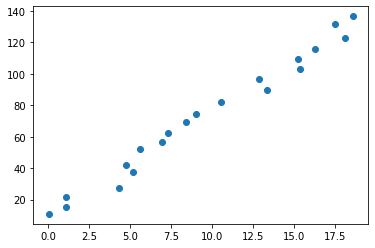

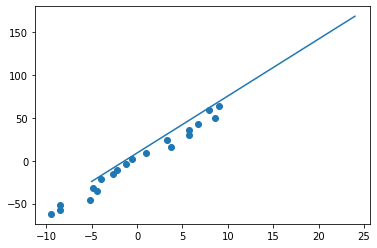

6.650042125050906

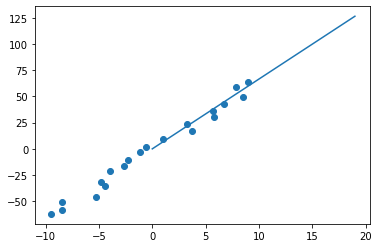